#TC1002s Activity 2: Descriptive statistics
##Angel Guillermo Bosquez Baltazar - A01667100
##An initial exploratory analysis of the Video-Games sales and ratings Dataset

Link to repository: https://github.com/DurandalAGB/TC1002sActivities/tree/main/Activity2

Link to original colab: https://colab.research.google.com/drive/1jW8gi-FbBbBaHSTDPqB-bOxrOgaRHMcq?usp=sharing

Before running any of the code blocks, please uplaod the Video_Games.csv file to the Files(Archivos) Section

In [3]:
#Step 1. we load our dataset to collab and  import the python libraries we need for our analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#We use Pandas to load our data
df = pd.read_csv("Video_Games.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

Using df.info(), we can examine the structure of our dataset.

It contains 16,928 entries and 17 columns, this should be enough information. There's variables like sales by region (NA_Sales, EU_Sales)
Scores by type of person (User_Score and Critic_Score)

The data is mostly numerical (in float64), some columns are stored as string objects.

Also, some of the columns have missing values which we will need to clean before any future steps


df.head() and df.tail() will show us the first and last rows of our dataset respectively

In [2]:
df.head()


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003.0,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005.0,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MonHun Nikki: Poka Poka Ailu Mura,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN


Using df.dtypes, we examine the data types of each column in our dataset.


In [4]:
df.dtypes


,0
index,int64
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [5]:
df.columns


Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=16928, step=1)

In [7]:
df.values

array([[0, 'Wii Sports', 'Wii', ..., 322.0, 'Nintendo', 'E'],
       [1, 'Super Mario Bros.', 'NES', ..., nan, nan, nan],
       [2, 'Mario Kart Wii', 'Wii', ..., 709.0, 'Nintendo', 'E'],
       ...,
       [16925, 'Yakuza: Dead Souls', 'PS3', ..., 69.0,
        'Ryu ga Gotoku Studios', 'M'],
       [16926, 'Fight Night Round 2', 'XB', ..., 27.0, 'EA Sports', 'T'],
       [16927, 'MonHun Nikki: Poka Poka Ailu Mura', 'PSP', ..., nan, nan,
        nan]], dtype=object)

We can examine individual rows with df.loc(), in this example we're looking at row 78, which represents the game Halo 2, . It was released in 2004 for the Xbox and developed by Bungie Software. It achieved:

Global Sales of 8,49 billion
A Critical score of 95.0, placing it among the highest-rated games
A user score of 8.2, indicating a good public reception
And a user count of 1,218.


In [8]:
df.loc[78]

,78
index,78
Name,Halo 2
Platform,XB
Year_of_Release,2004.0
Genre,Shooter
Publisher,Microsoft Game Studios
NA_Sales,6.82
EU_Sales,1.53
JP_Sales,0.05
Other_Sales,0.08


In [16]:
#we can add filters inside of loc, too. This line only returns the games launched in 2015
display(df.loc[(df.Year_of_Release==2015)])

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
77,77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
87,87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN
99,99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN,NaN,NaN,NaN
105,105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16742,16742,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16763,16763,Evolve,XOne,2015.0,Shooter,Take-Two Interactive,0.37,0.20,0.00,0.06,0.64,74.0,31.0,5.1,336.0,Turtle Rock Studios,M
16809,16809,NHL 16,PS4,2015.0,Sports,Electronic Arts,0.36,0.16,0.00,0.11,0.63,78.0,28.0,5.5,157.0,"EA Sports, EA Canada",E10+
16825,16825,LEGO Jurassic World,3DS,2015.0,Action,Warner Bros. Interactive Entertainment,0.31,0.23,0.03,0.05,0.62,NaN,NaN,7.2,11.0,TT Games,E10+


<ipython-input-8-8e5ef8bef1d3>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d[col].dropna() for col in columns_to_plot],


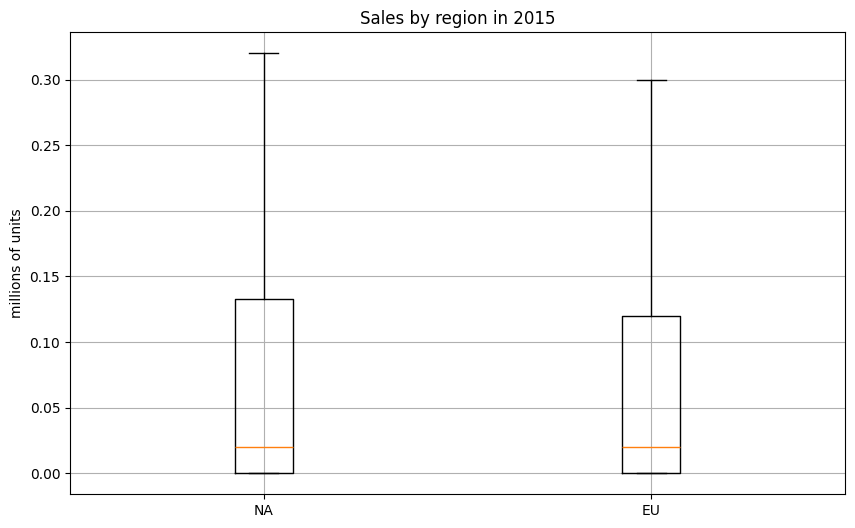

In [8]:
import matplotlib.pyplot as plt

#we keep using games released on 2015
d = df[df["Year_of_Release"] == 2015]

#colums of regions to compare
columns_to_plot = ["NA_Sales", "EU_Sales"]

plt.figure(figsize=(10, 6))
plt.boxplot([d[col].dropna() for col in columns_to_plot],
            labels=["NA", "EU"],
            showfliers=False)  #we take out massive sellers like CoD and FIFA to get better results

plt.title("Sales by region in 2015")
plt.ylabel("millions of units")
plt.grid(True)
plt.show()


This boxplot compares sales in the North American and Europe regions for 2015. It shows most games sold under 0.1 million units, a small number of games achieved higher sales.

North America shows slightly higher sales, but both regions follow a similar trend for this year.

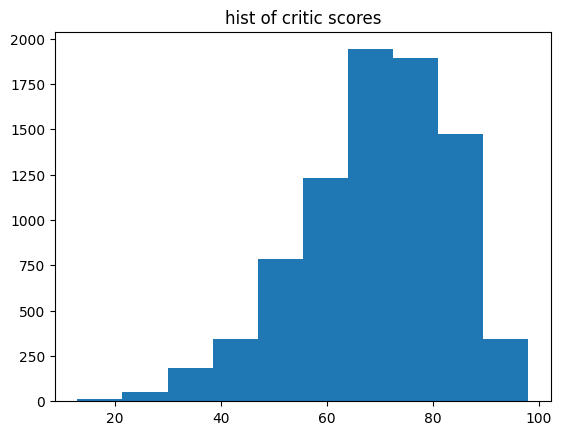

In [9]:
plt.hist(df["Critic_Score"], bins=10)
plt.title("hist of critic scores")
plt.show()

This histogram displays video-game distributions based on their critic score, we can observe that:

most games received a critic score between 60 and 80.

There are very few low-scoring games (below 50).



In [19]:

df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')


df_filtered = df[["Global_Sales", "Critic_Score", "User_Score"]].dropna()


correlaciones = df_filtered.corr()
print(correlaciones)



              Global_Sales  Critic_Score  User_Score
Global_Sales      1.000000      0.238471    0.091376
Critic_Score      0.238471      1.000000    0.580628
User_Score        0.091376      0.580628    1.000000


To explore possible relationships between sales and ratings, we created a correlation matrix using the corr() function.


Before doing it, we converted the User_Score column from string to numeric using pd.to_numeric(), setting incomplete values to NaN, and then used .dropna() to exclude these incomplete rows.




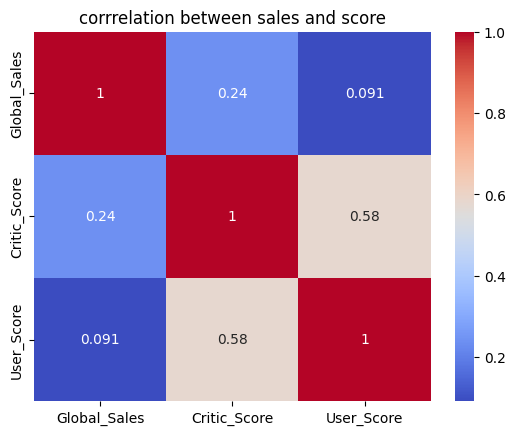

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlaciones, annot=True, cmap="coolwarm")
plt.title("corrrelation between sales and score")
plt.show()

To better visualize this correlation, we made a heatmap using seaborn, this shows the weak to moderate positive correlation between these values

##To better understand the relationship between reviews and market performance, we extended our correlation analysis to include all regions

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')

columns_to_include = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "User_Score"]
df_filtered = df[columns_to_include].dropna()

correlaciones1 = df_filtered.corr()
print(correlaciones1)




              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  \
NA_Sales      1.000000  0.840603  0.469317     0.727629      0.234877   
EU_Sales      0.840603  1.000000  0.517454     0.719458      0.213056   
JP_Sales      0.469317  0.517454  1.000000     0.392828      0.148733   
Other_Sales   0.727629  0.719458  0.392828     1.000000      0.191988   
Critic_Score  0.234877  0.213056  0.148733     0.191988      1.000000   
User_Score    0.089317  0.057828  0.130217     0.058857      0.580628   

              User_Score  
NA_Sales        0.089317  
EU_Sales        0.057828  
JP_Sales        0.130217  
Other_Sales     0.058857  
Critic_Score    0.580628  
User_Score      1.000000  


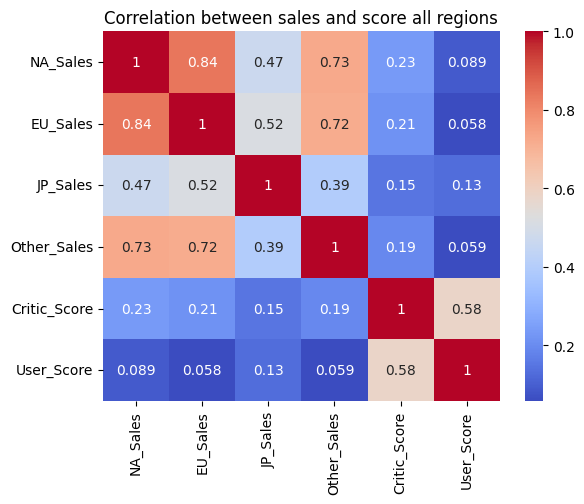

In [21]:
sns.heatmap(correlaciones1, annot=True, cmap="coolwarm")
plt.title("Correlation between sales and score all regions")
plt.show()

##we can appreciate that critic reviews have a modest influence on sales, while user reviews don't have a lot of impact